## Principal Component Analysis (PCA) - Lab Enhancement
### 

Created by Ahmad Luqman (1211101384).
___

### **Introduction to PCA**

1. **_What is PCA?_**

    Principal Component Analysis (PCA) is a linear dimensionality reduction technique used to transform high-dimensional datasets into lower-dimensional representations while preserving as much variance (information) as possible. This is achieved by finding new axes (principal components) that best capture the variance in the data.

    In simpler terms, PCA helps reduce the number of variables while keeping the most important information intact. It is often used when:
    - Data has too many features, making it difficult to visualize or analyze.
    - Features are highly correlated, leading to redundancy.
    - There is a need to improve computational efficiency.


2. **_Why is PCA Important?_**

    
    **a. Curse of Dimensionality**  
    When datasets have a large number of features, many machine learning algorithms struggle because:
    - Training time increases exponentially.
    - High-dimensional data can cause models to overfit.
    - Too many features introduce noise, making it harder to learn meaningful patterns.

    PCA mitigates this problem by reducing feature dimensionality, making it easier to process, visualize, and interpret.

    **b. Correlated Features and Redundancy**  
    Many real-world datasets contain correlated features. For example, in medical diagnostics, tumor size and perimeter might be highly correlated, meaning they provide similar information. PCA identifies these correlations and creates new features (principal components) that capture this redundancy, reducing the dataset’s complexity.


### **Advantages of PCA**   
PCA is widely used because it offers multiple benefits:

1. **_Reduces Computational Cost_**  
In high-dimensional datasets, training machine learning models is slow. PCA reduces the number of features, making training faster and less resource-intensive.

2. **_Handles Multicollinearity_**  
Many machine learning models (like linear regression) perform poorly when features are highly correlated. PCA eliminates this problem by transforming correlated features into uncorrelated principal components.

3. **_Improves Model Performance_**  
By removing noise and redundant features, PCA can enhance accuracy.
    - Example: In genomics, where thousands of gene expressions exist, PCA helps focus on the most significant genetic markers.

4. **_Helps in Visualization_**  
PCA allows visualization of high-dimensional data in 2D or 3D, making it easier to understand relationships in data.

5. **_Reduces Overfitting_**  
PCA prevents overfitting by removing unnecessary features that do not contribute significantly to the target variable.

### **Disadvantages of PCA**  
While PCA is powerful, it has limitations:

1. **_Loss of Interpretability_**  
Principal components do not have direct real-world meaning.
    - Example: In the PCA Lab of breast cancer dataset, instead of "Tumor Radius," PCA outputs "Principal Component 1," which is harder to interpret.

2. **_Assumes Linearity_**  
Standard PCA assumes that data is linearly correlated. It does not work well with non-linear data (e.g., facial recognition, speech analysis).
    - Solution: Use Kernel PCA (KPCA), Kernel PCA extends PCA by using kernel functions to map data into a higher-dimensional space, where linear separation is possible.

3. **_Sensitive to Scaling_**  
If data is not normalized, features with larger values dominate.
    - Solution: Always standardize data before applying PCA.

4. **_Can Discard Useful Information_**  
If too many components are removed, valuable information might be lost.
    - Example: In medical datasets, reducing too many dimensions might eliminate key diagnostic markers.

### **Uses of PCA in Machine Learning**
PCA is useful in various machine learning applications:

1. **_Preprocessing Before Machine Learning_**  
    PCA removes noise, leading to better model performance. Used in SVM, Logistic Regression, Decision Trees.

2. **_Feature Engineering_**  
    Helps in creating new feature sets from raw data.
 
3. **_Noise Reduction_**  
    PCA extracts key patterns and removes noise from data.

4. **_Data Visualization_**  
    PCA allows complex datasets to be plotted in 2D or 3D.

### **Example of Real-World Applications of PCA**
PCA is widely used across multiple industries:

1. 🏥 **Healthcare**  
    - Breast Cancer Diagnosis: PCA helps identify key tumor features in medical imaging.  
    - Genomics: PCA reduces dimensions in gene expression data.

2. 📸 **Image Processing**  
    - Facial Recognition: PCA-based Eigenfaces method for recognizing human faces.  
    - Object Detection: PCA extracts key features from CIFAR-10.

3. 🕵 **Cybersecurity**  
    - Phishing Detection: PCA improves malicious website classification.  
    - Intrusion Detection: Identifies unusual network patterns.

4. 📈 **Finance & Stock Market**  
    - Portfolio Optimization: PCA finds correlated stocks to minimize risks.  
    - Fraud Detection: Detects anomalies in transactions.

## **PCA Implementation of Real World Dataset**
### _Phishing Detection with PCA_

PhisUSIIL Dataset is taken from  UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/967/phiusiil%2Bphishing%2Burl%2Bdataset)

#### About the Dataset
PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.

- Column "FILENAME" can be ignored.

- Class Labels:  

    - Label 1 corresponds to a legitimate URL, label 0 to a phishing URL

### **1. Importing the library**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### **2. Load the data & Inspect the Dataset**

In [2]:
# Load dataset
file_path = "Phishing_url_dataset_A.csv"
phish_dataset = pd.read_csv(file_path).sample(n=500, random_state=10)  # Randomly select 1000 rows

# Display the first few rows
print(phish_dataset.head())

# Display basic info about the phish_dataset
print(phish_dataset.info())

# Display the data types
print(phish_dataset.dtypes)

phish_dataset

           FILENAME                                                URL  \
70102   8139406.txt  https://bafybeiacfgpk53mjw3zh5a4ahzgtwvh7as4wo...   
87170    178496.txt                            https://www.keyshot.com   
46625    236932.txt                        https://www.deepsprings.edu   
226641    45172.txt                           https://www.initlive.com   
11379   8006675.txt  https://acdecon.be/nf/nf/tw/netflix/myaccount_...   

        URLLength                                             Domain  \
70102          97  bafybeiacfgpk53mjw3zh5a4ahzgtwvh7as4wowbrd2any...   
87170          22                                    www.keyshot.com   
46625          26                                www.deepsprings.edu   
226641         23                                   www.initlive.com   
11379          52                                         acdecon.be   

        DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
70102             76           0  com            8.019470   


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
70102,8139406.txt,https://bafybeiacfgpk53mjw3zh5a4ahzgtwvh7as4wo...,97,bafybeiacfgpk53mjw3zh5a4ahzgtwvh7as4wowbrd2any...,76,0,com,8.019470,0.222222,0.522907,...,0,0,0,0,0,0,0,0,0,0
87170,178496.txt,https://www.keyshot.com,22,www.keyshot.com,15,0,com,100.000000,1.000000,0.522907,...,0,0,1,62,30,43,130,0,141,1
46625,236932.txt,https://www.deepsprings.edu,26,www.deepsprings.edu,19,0,edu,100.000000,1.000000,0.011501,...,0,0,1,34,16,17,96,6,89,1
226641,45172.txt,https://www.initlive.com,23,www.initlive.com,16,0,com,100.000000,1.000000,0.522907,...,1,0,1,38,26,70,83,0,89,1
11379,8006675.txt,https://acdecon.be/nf/nf/tw/netflix/myaccount_...,52,acdecon.be,10,0,be,20.360709,1.000000,0.003319,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105481,97722.txt,https://www.fcnl.org,19,www.fcnl.org,12,0,org,100.000000,1.000000,0.079963,...,0,0,0,16,2,5,64,0,17,1
178910,107753.txt,https://www.groplay.com,22,www.groplay.com,15,0,com,100.000000,1.000000,0.522907,...,0,0,1,59,8,19,73,4,100,1
26336,8081243.txt,https://dark-bird-54ca.ktvbrvqtatr.workers.dev/,47,dark-bird-54ca.ktvbrvqtatr.workers.dev,38,0,dev,35.968464,0.411765,0.000961,...,0,0,0,0,0,0,0,0,1,0
99280,763049.txt,https://www.southernsoulrnb.com,30,www.southernsoulrnb.com,23,0,com,100.000000,1.000000,0.522907,...,0,0,1,6,1,6,20,0,4,1


### **3. Data Preprocessing** 
Before applying PCA, we need to clean and prepare the data.

- #### **Remove Unnecessary Columns**  
    From the dataset description, the "FILENAME" column can be ignored.

In [3]:
# Drop the "FILENAME" column
phish_dataset = phish_dataset.drop(columns=["FILENAME"], errors="ignore")

# Check the remaining columns
print(phish_dataset.columns)

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

- ### **Handle Missing Value**

    Separately handle missing values for numerical and categorical columns.
    - Fill Missing Values for Numerical Columns
    - Fill Missing Values for Categorical Columns

    .mean() is applied only to numerical columns, avoiding errors.


In [4]:
# Count missing values per column
missing_values = phish_dataset.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values


# Drop Columns with Too Many Missing Values
# If a column has too many missing values (>50%), consider dropping it:
phish_dataset = phish_dataset.dropna(axis=1, thresh=int(0.5 * len(phish_dataset)))


# 1. Fill Missing Values for Numerical Columns
# Select only numerical columns
numerical_cols = phish_dataset.select_dtypes(include=["number"]).columns

# Fill missing values with column mean
phish_dataset[numerical_cols] = phish_dataset[numerical_cols].fillna(phish_dataset[numerical_cols].mean())


# 2. Fill Missing Values for Categorical Columns
# Select categorical (text) columns
categorical_cols = phish_dataset.select_dtypes(include=["object"]).columns

# Fill missing values with the most common value (mode)
phish_dataset[categorical_cols] = phish_dataset[categorical_cols].fillna(phish_dataset[categorical_cols].mode().iloc[0])


# Step 3: Verify Fix
print("Missing values after handling:\n", phish_dataset.isnull().sum().sum())


phish_dataset


Series([], dtype: int64)
Missing values after handling:
 0


,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
70102,https://bafybeiacfgpk53mjw3zh5a4ahzgtwvh7as4wo...,97,bafybeiacfgpk53mjw3zh5a4ahzgtwvh7as4wowbrd2any...,76,0,com,8.019470,0.222222,0.522907,0.039558,...,0,0,0,0,0,0,0,0,0,0
87170,https://www.keyshot.com,22,www.keyshot.com,15,0,com,100.000000,1.000000,0.522907,0.059021,...,0,0,1,62,30,43,130,0,141,1
46625,https://www.deepsprings.edu,26,www.deepsprings.edu,19,0,edu,100.000000,1.000000,0.011501,0.053945,...,0,0,1,34,16,17,96,6,89,1
226641,https://www.initlive.com,23,www.initlive.com,16,0,com,100.000000,1.000000,0.522907,0.062101,...,1,0,1,38,26,70,83,0,89,1
11379,https://acdecon.be/nf/nf/tw/netflix/myaccount_...,52,acdecon.be,10,0,be,20.360709,1.000000,0.003319,0.052098,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105481,https://www.fcnl.org,19,www.fcnl.org,12,0,org,100.000000,1.000000,0.079963,0.058753,...,0,0,0,16,2,5,64,0,17,1
178910,https://www.groplay.com,22,www.groplay.com,15,0,com,100.000000,1.000000,0.522907,0.058986,...,0,0,1,59,8,19,73,4,100,1
26336,https://dark-bird-54ca.ktvbrvqtatr.workers.dev/,47,dark-bird-54ca.ktvbrvqtatr.workers.dev,38,0,dev,35.968464,0.411765,0.000961,0.045043,...,0,0,0,0,0,0,0,0,1,0
99280,https://www.southernsoulrnb.com,30,www.southernsoulrnb.com,23,0,com,100.000000,1.000000,0.522907,0.060494,...,0,0,1,6,1,6,20,0,4,1


- #### **Encode Class Labels**
    The target column (labels) is binary (0 = phishing, 1 = legitimate).

In [5]:
# the label column is named "label"
X = phish_dataset.drop(columns=["label"])  # Features (independent variables)
y = phish_dataset["label"]  # Target labels (dependent variable)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (500, 54)
Labels shape: (500,)


- #### **Remove or Encode Text Columns**
    We have two option to handle these text-based columns before standardization:  
    - Option 1: Remove Irrelevant Text Columns  
    - Option 2: Encode Categorical Features  

In [6]:
# Option 2
from sklearn.preprocessing import LabelEncoder

# Encode text columns
label_encoders = {}  # Dictionary to store encoders for future use
for col in ["TLD", "Title"]:  # Only encode meaningful text columns
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save encoder for later

# Option 1
# Drop non-numeric columns
X_numeric = X.drop(columns=["FILENAME", "URL", "Domain"], errors="ignore")

print("Encoded categorical columns successfully.")

X_numeric

Encoded categorical columns successfully.


,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
70102,97,76,0,22,8.019470,0.222222,0.522907,0.039558,3,2,...,0,0,0,0,0,0,0,0,0,0
87170,22,15,0,22,100.000000,1.000000,0.522907,0.059021,3,1,...,0,0,0,1,62,30,43,130,0,141
46625,26,19,0,27,100.000000,1.000000,0.011501,0.053945,3,1,...,0,0,0,1,34,16,17,96,6,89
226641,23,16,0,22,100.000000,1.000000,0.522907,0.062101,3,1,...,1,1,0,1,38,26,70,83,0,89
11379,52,10,0,6,20.360709,1.000000,0.003319,0.052098,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105481,19,12,0,58,100.000000,1.000000,0.079963,0.058753,3,1,...,0,0,0,0,16,2,5,64,0,17
178910,22,15,0,22,100.000000,1.000000,0.522907,0.058986,3,1,...,0,0,0,1,59,8,19,73,4,100
26336,47,38,0,25,35.968464,0.411765,0.000961,0.045043,3,2,...,0,0,0,0,0,0,0,0,0,1
99280,30,23,0,22,100.000000,1.000000,0.522907,0.060494,3,1,...,0,0,0,1,6,1,6,20,0,4


- ### **Standardize Featuress** 
    PCA is sensitive to different feature scales, so we normalize the features.   
    Now that we removed or encoded text columns, we can apply StandardScaler()

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize only numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

feature_names = X_numeric.columns.tolist()
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

# Print the shape of the standardized dataset
print("Scaled dataset shape:", X_scaled.shape)


Scaled dataset shape: (500, 52)


### **4. Apply PCA and Determine the Number of Components**
To decide how many principal components to retain, we check explained variance.

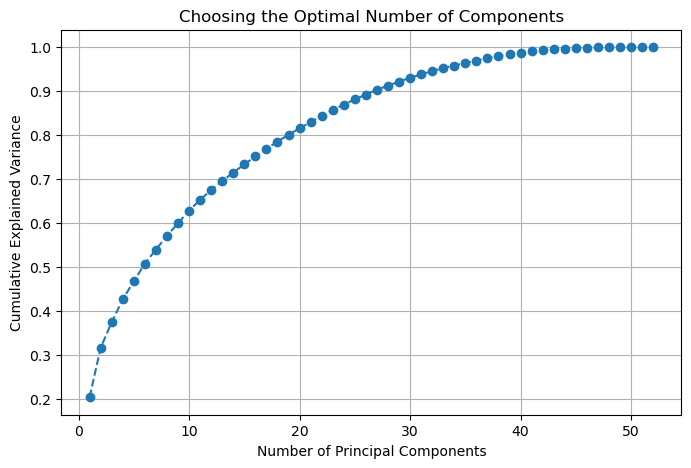

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA without specifying components (to analyze variance)
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Optimal Number of Components")
plt.grid()
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Placeholder for feature names
feature_names = X_numeric.columns.tolist()

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Convert scaled data into DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

# Apply PCA (Extract Top 10 Principal Components)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Compute PCA Loadings (Eigenvectors)
pca_loadings = pd.DataFrame(pca.components_.T, 
                            columns=[f"PC{i+1}" for i in range(10)], 
                            index=feature_names)

# Display the PCA Loadings Table
import matplotlib.pyplot as plt

# Show the PCA Loadings DataFrame
pca_loadings = pca_loadings.round(6)

# Define a threshold for significant feature influence
threshold = 0.2  # Adjust as needed

# Identify features that have a high influence on each PC
high_contributing_features = {}
for pc in pca_loadings.columns:  # Loop through each PC (PC1, PC2, ..., PC10)
    high_contributing_features[pc] = pca_loadings[abs(pca_loadings[pc]) > threshold][pc]

# Find max list length
max_length = max(len(features) for features in high_contributing_features.values())

# Pad shorter lists with None for uniformity
padded_features = {pc: list(features.index) + [None] * (max_length - len(features))
                   for pc, features in high_contributing_features.items()}

# Convert to DataFrame
high_contributing_features_df = pd.DataFrame(padded_features)

# Display the DataFrame
print(high_contributing_features_df)


                          PC1                         PC2  \
0          URLSimilarityIndex                   URLLength   
1  NoOfOtherSpecialCharsInURL                  IsDomainIP   
2       DomainTitleMatchScore            NoOfLettersInURL   
3          URLTitleMatchScore             NoOfDegitsInURL   
4              HasDescription             NoOfEqualsInURL   
5                HasSocialNet              NoOfQMarkInURL   
6                        None          NoOfAmpersandInURL   
7                        None  NoOfOtherSpecialCharsInURL   
8                        None                        None   
9                        None                        None   

                     PC3                 PC4                PC5  \
0   CharContinuationRate          IsDomainIP                TLD   
1          NoOfSubDomain           TLDLength  TLDLegitimateProb   
2         HasObfuscation      HasObfuscation         LineOfCode   
3     NoOfObfuscatedChar  NoOfObfuscatedChar           HasTi

### **5. Visualizing PCA Scatter Plot**  
To visualize phishing vs. legitimate URLs, we create a scatter plot using PC1 & PC2.

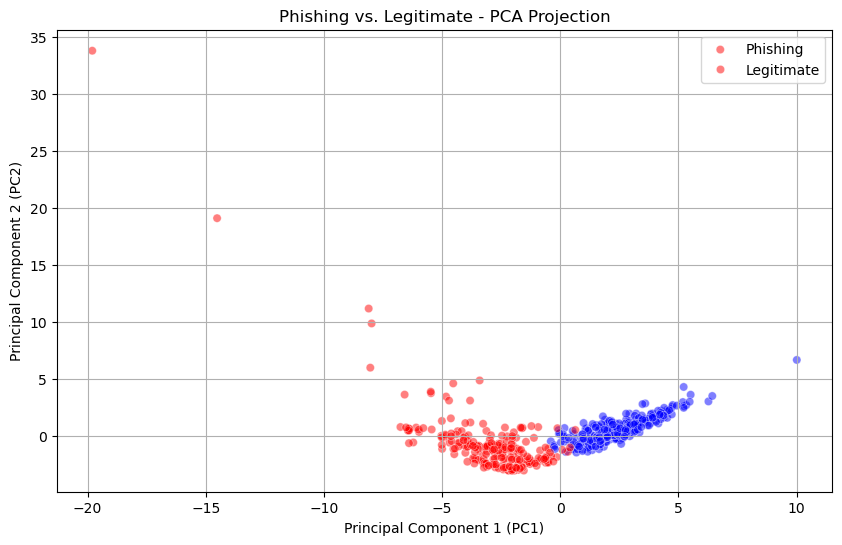

In [10]:
import seaborn as sns
import pandas as pd

# Apply PCA (Keep Only PC1 & PC2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA-transformed data into DataFrame
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Label"] = y.values  # Add labels for coloring

# Scatter plot using PC1 and PC2
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["Label"], alpha=0.5, palette={0: "red", 1: "blue"})

plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("Phishing vs. Legitimate - PCA Projection")
plt.legend(["Phishing", "Legitimate"])
plt.grid(True)
plt.show()


### **6. Removing Outlier in PCA Component**
To remove outliers from the PCA projection scatter plot, we need to apply outlier detection techniques to filter extreme values.

- #### **Step 1: Identify Outliers in PCA Components**
    We can use Interquartile Range (IQR) to detect outliers in PC1 and PC2.

In [11]:
import numpy as np
import pandas as pd

# Define function to remove outliers using IQR
def remove_outliers(df, col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    # Define upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply PCA (Keep Only PC1 & PC2)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA-transformed data into DataFrame
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Label"] = y.values  # Add labels for coloring

# Remove outliers from both PC1 & PC2
pca_df_filtered = remove_outliers(pca_df, "PC1")
pca_df_filtered = remove_outliers(pca_df_filtered, "PC2")

# Display the shape of data before and after removing outliers
print(f"Original PCA data shape: {pca_df.shape}")
print(f"Filtered PCA data shape: {pca_df_filtered.shape}")


Original PCA data shape: (500, 3)
Filtered PCA data shape: (489, 3)


- #### **Step 2: Re-Plot Scatter Plot Without Outliers**

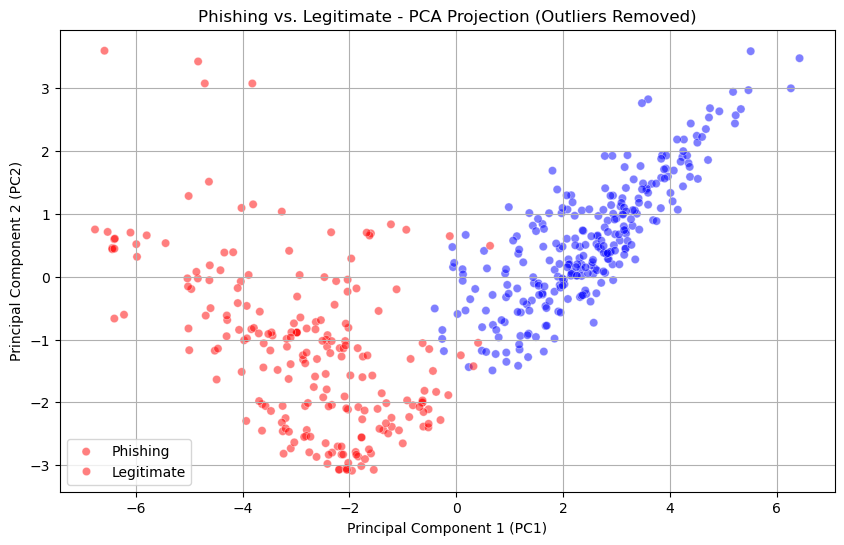

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-plot PCA scatter plot without outliers
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_df_filtered["PC1"], y=pca_df_filtered["PC2"], hue=pca_df_filtered["Label"], 
                alpha=0.5, palette={0: "red", 1: "blue"})

plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("Phishing vs. Legitimate - PCA Projection (Outliers Removed)")
plt.legend(["Phishing", "Legitimate"])
plt.grid(True)
plt.show()


### **7. Train a Machine Learning Model (Baseline)** 
Before applying PCA, we first train a baseline model using the original dataset.

- #### **Train a Linear Regression Model (Without PCA)**
    Let's first train Linear Regression on the original dataset before applying PCA.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"📌 Accuracy Without PCA: {accuracy:.4f}")
print("Classification Report Without PCA:\n", classification_report(y_test, y_pred))


📌 Accuracy Without PCA: 1.0000
Classification Report Without PCA:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        46

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### **8. Train Classification Model With PCA**
Now, we apply PCA and train the model on reduced dimensions.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Extract features & labels after outlier removal
X_final = pca_df_filtered.drop(columns=["Label"])
y_final = pca_df_filtered["Label"]

# Split data into training and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Train Logistic Regression Model
log_reg_pca = LogisticRegression(max_iter=500)
log_reg_pca.fit(X_train_pca, y_train_pca)

# Predict and Evaluate
y_pred_pca = log_reg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

print(f"🔹 Logistic Regression Accuracy with PCA (Outliers Removed): {accuracy_pca:.4f}")
print("🔹 Classification Report with PCA:\n", classification_report(y_test_pca, y_pred_pca))


🔹 Logistic Regression Accuracy with PCA (Outliers Removed): 0.9898
🔹 Classification Report with PCA:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        45

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



### **Reference**
1. ML_Lab05_PCA_241202.ipynb - YP Wong
2. ML_Lab06_PCAFromScratch_231205a.ipynb - YP Wong
3. Principal Component Analysis (PCA) - GeeksforGeeks (https://www.geeksforgeeks.org/principal-component-analysis-pca/)
4. A Guide to Principal Component Analysis (PCA) for Machine Learning (https://www.keboola.com/blog/pca-machine-learning)
5. Secrets of PCA: A Comprehensive Guide to Principal Component Analysis with Python and Colab (https://drlee.io/secrets-of-pca-a-comprehensive-guide-to-principal-component-analysis-with-python-and-colab-6f7f3142e721)
6. Principal Component Analysis (PCA) (https://medium.com/@denizgunay/principal-component-analysis-pca-d8edf2bb6620)
7. Phishing Dataset: PhiUSIIL Phishing URL Dataset (https://archive.ics.uci.edu/dataset/967/phiusiil%2Bphishing%2Burl%2Bdataset)